In [1]:
import seaborn as sns
import pandas as pd

In [2]:
diamonds = pd.read_csv("Data Viz with Matplotlib & Seaborn/Data/Diamonds Prices2022.csv")

In [3]:
diamonds.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

<Axes: xlabel='carat', ylabel='cut'>

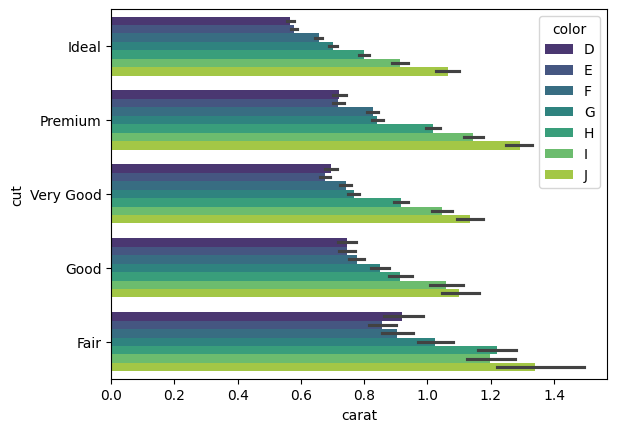

In [4]:
sns.barplot(
    x='carat', # se colocar a variavel numerica em X, automaticamente será horizontal.
    y='cut',
    data=diamonds.sort_values(by='color'),
    palette='viridis',
    hue='color'
)

<Axes: xlabel='cut', ylabel='carat'>

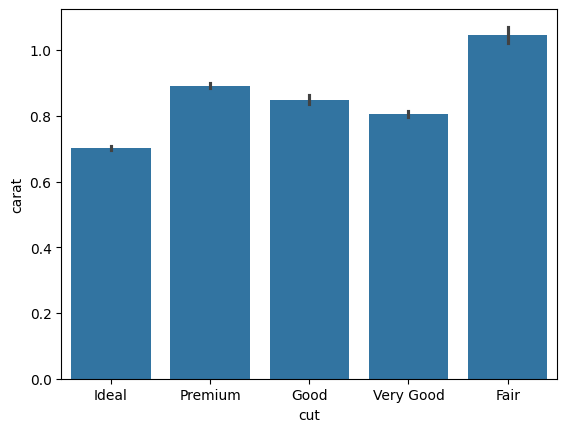

In [5]:
sns.barplot(
    x='cut',
    y='carat',
    data=diamonds
)

<Axes: xlabel='price', ylabel='Count'>

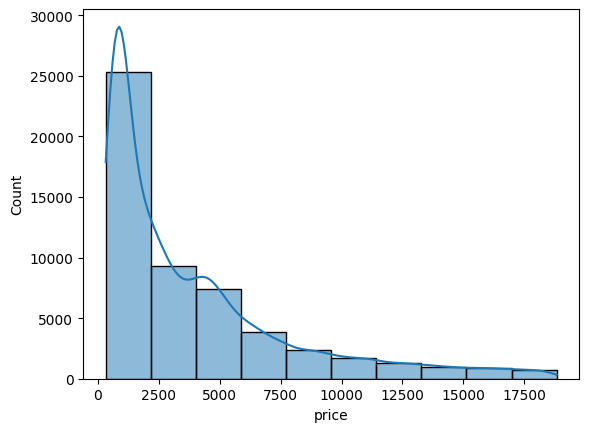

In [6]:
sns.histplot(
    x='price', 
    data=diamonds,
    bins=10,
    kde=True
    )

<Axes: xlabel='price', ylabel='cut'>

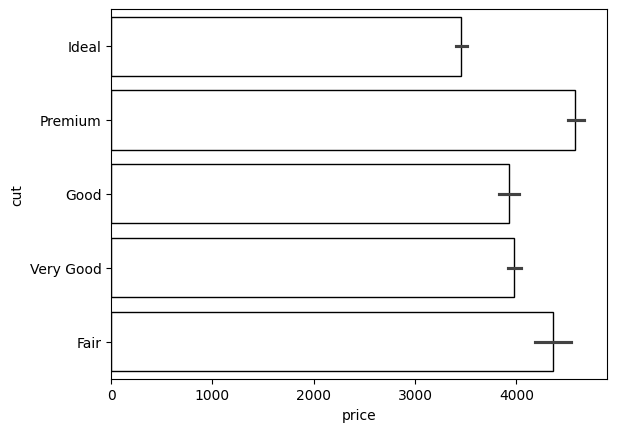

In [7]:
sns.barplot(
    x='price',
    y='cut',
    data=diamonds,
    facecolor='white',
    edgecolor='black'
)

<Axes: xlabel='price', ylabel='Count'>

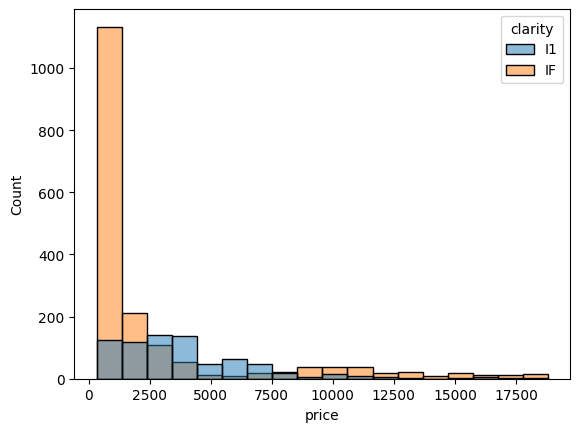

In [8]:
sns.histplot(
    x='price',
    hue='clarity',
    data=diamonds.query("clarity in ['I1', 'IF']"),
    bins=10,
    binwidth=1000
)

<Axes: xlabel='price', ylabel='Count'>

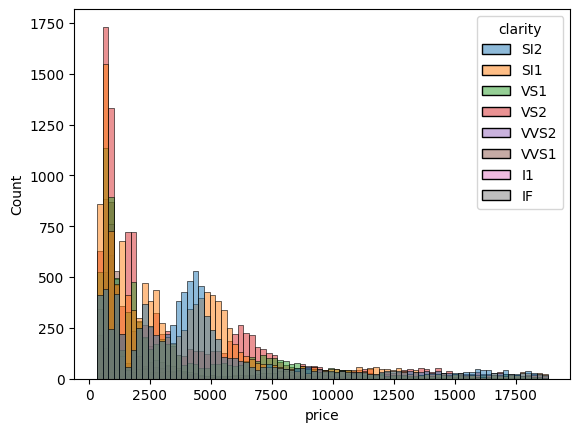

In [9]:
sns.histplot(
    x='price',
    hue='clarity',
    data=diamonds,
    cbar=True
)

<Axes: xlabel='x', ylabel='price'>

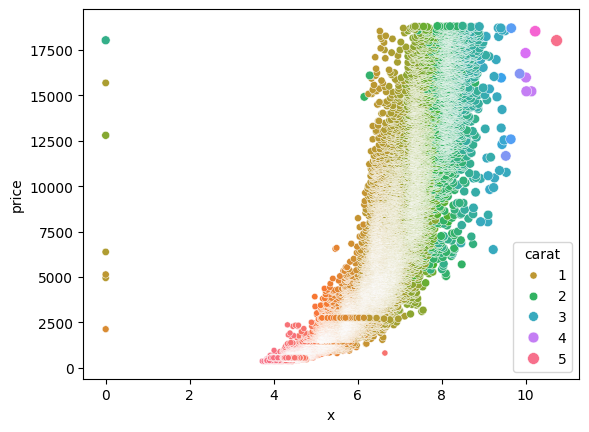

In [10]:
sns.scatterplot(
    x='x',
    y='price',
    data=diamonds,
    hue='carat',
    palette='husl',
    size='carat'
)

<Axes: xlabel='price'>

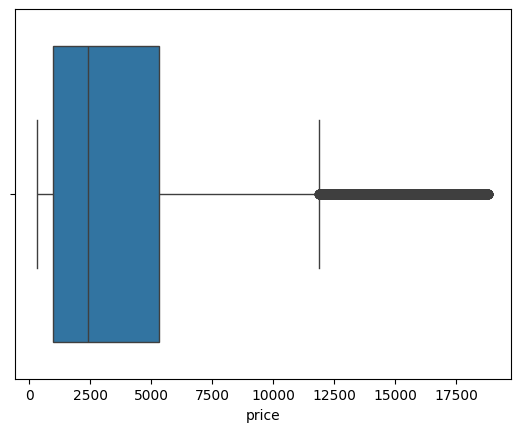

In [11]:
sns.boxplot(x='price', data=diamonds)

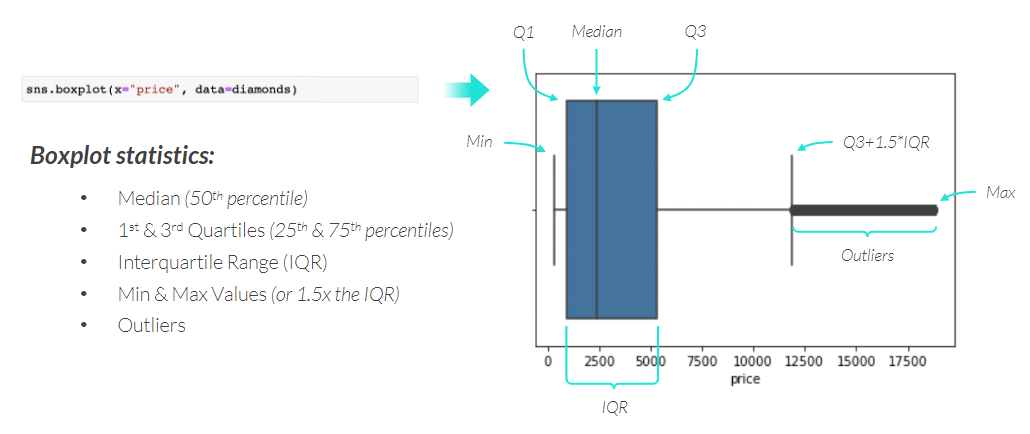

<Axes: xlabel='cut', ylabel='price'>

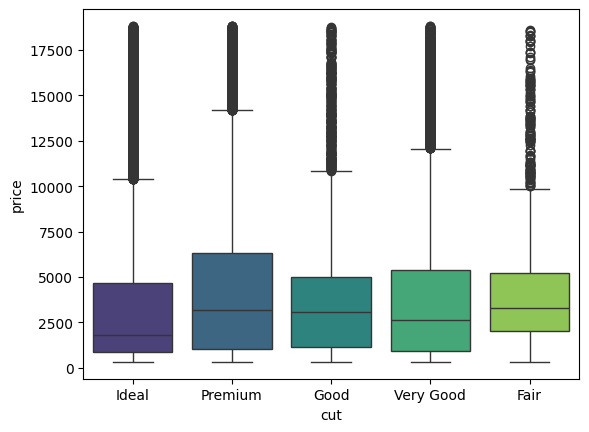

In [14]:
sns.boxplot(
    x='cut', 
    y='price', 
    data=diamonds,
    palette='viridis',
    hue='cut',
    legend=False
    )

<Axes: xlabel='cut', ylabel='price'>

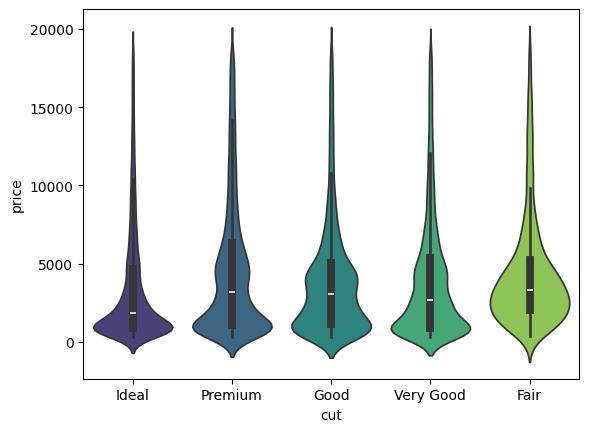

In [16]:
sns.violinplot(
    x='cut', 
    y='price', 
    data=diamonds,
    palette='viridis',
    hue='cut',
    legend=False
    )

<Axes: xlabel='carat', ylabel='price'>

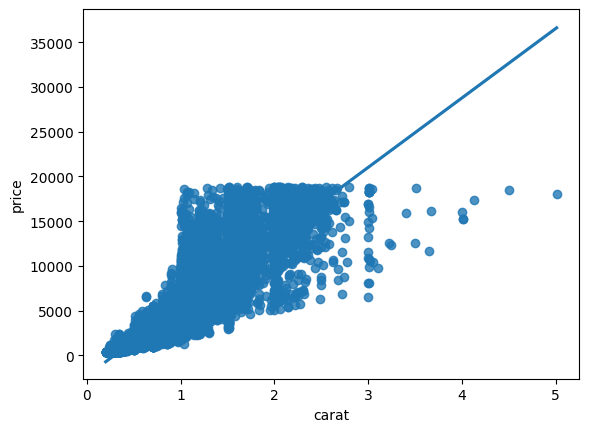

In [17]:
sns.regplot(x='carat',y='price', data=diamonds)

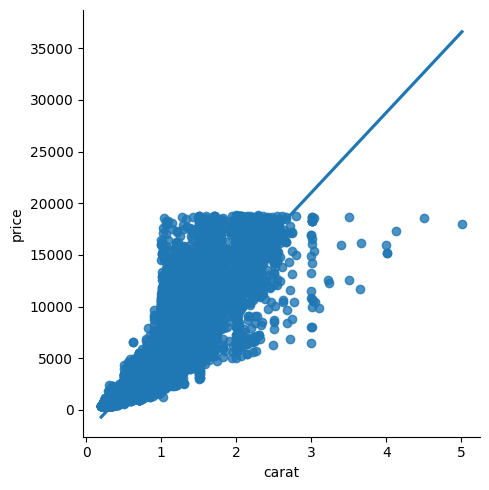

In [18]:
sns.lmplot(
    x='carat',
    y='price', 
    data=diamonds
    )

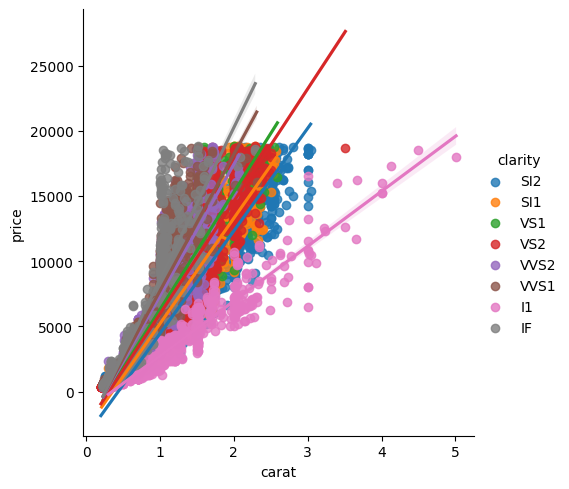

In [19]:
sns.lmplot(
    x='carat',
    y='price', 
    data=diamonds,
    hue='clarity'
    )

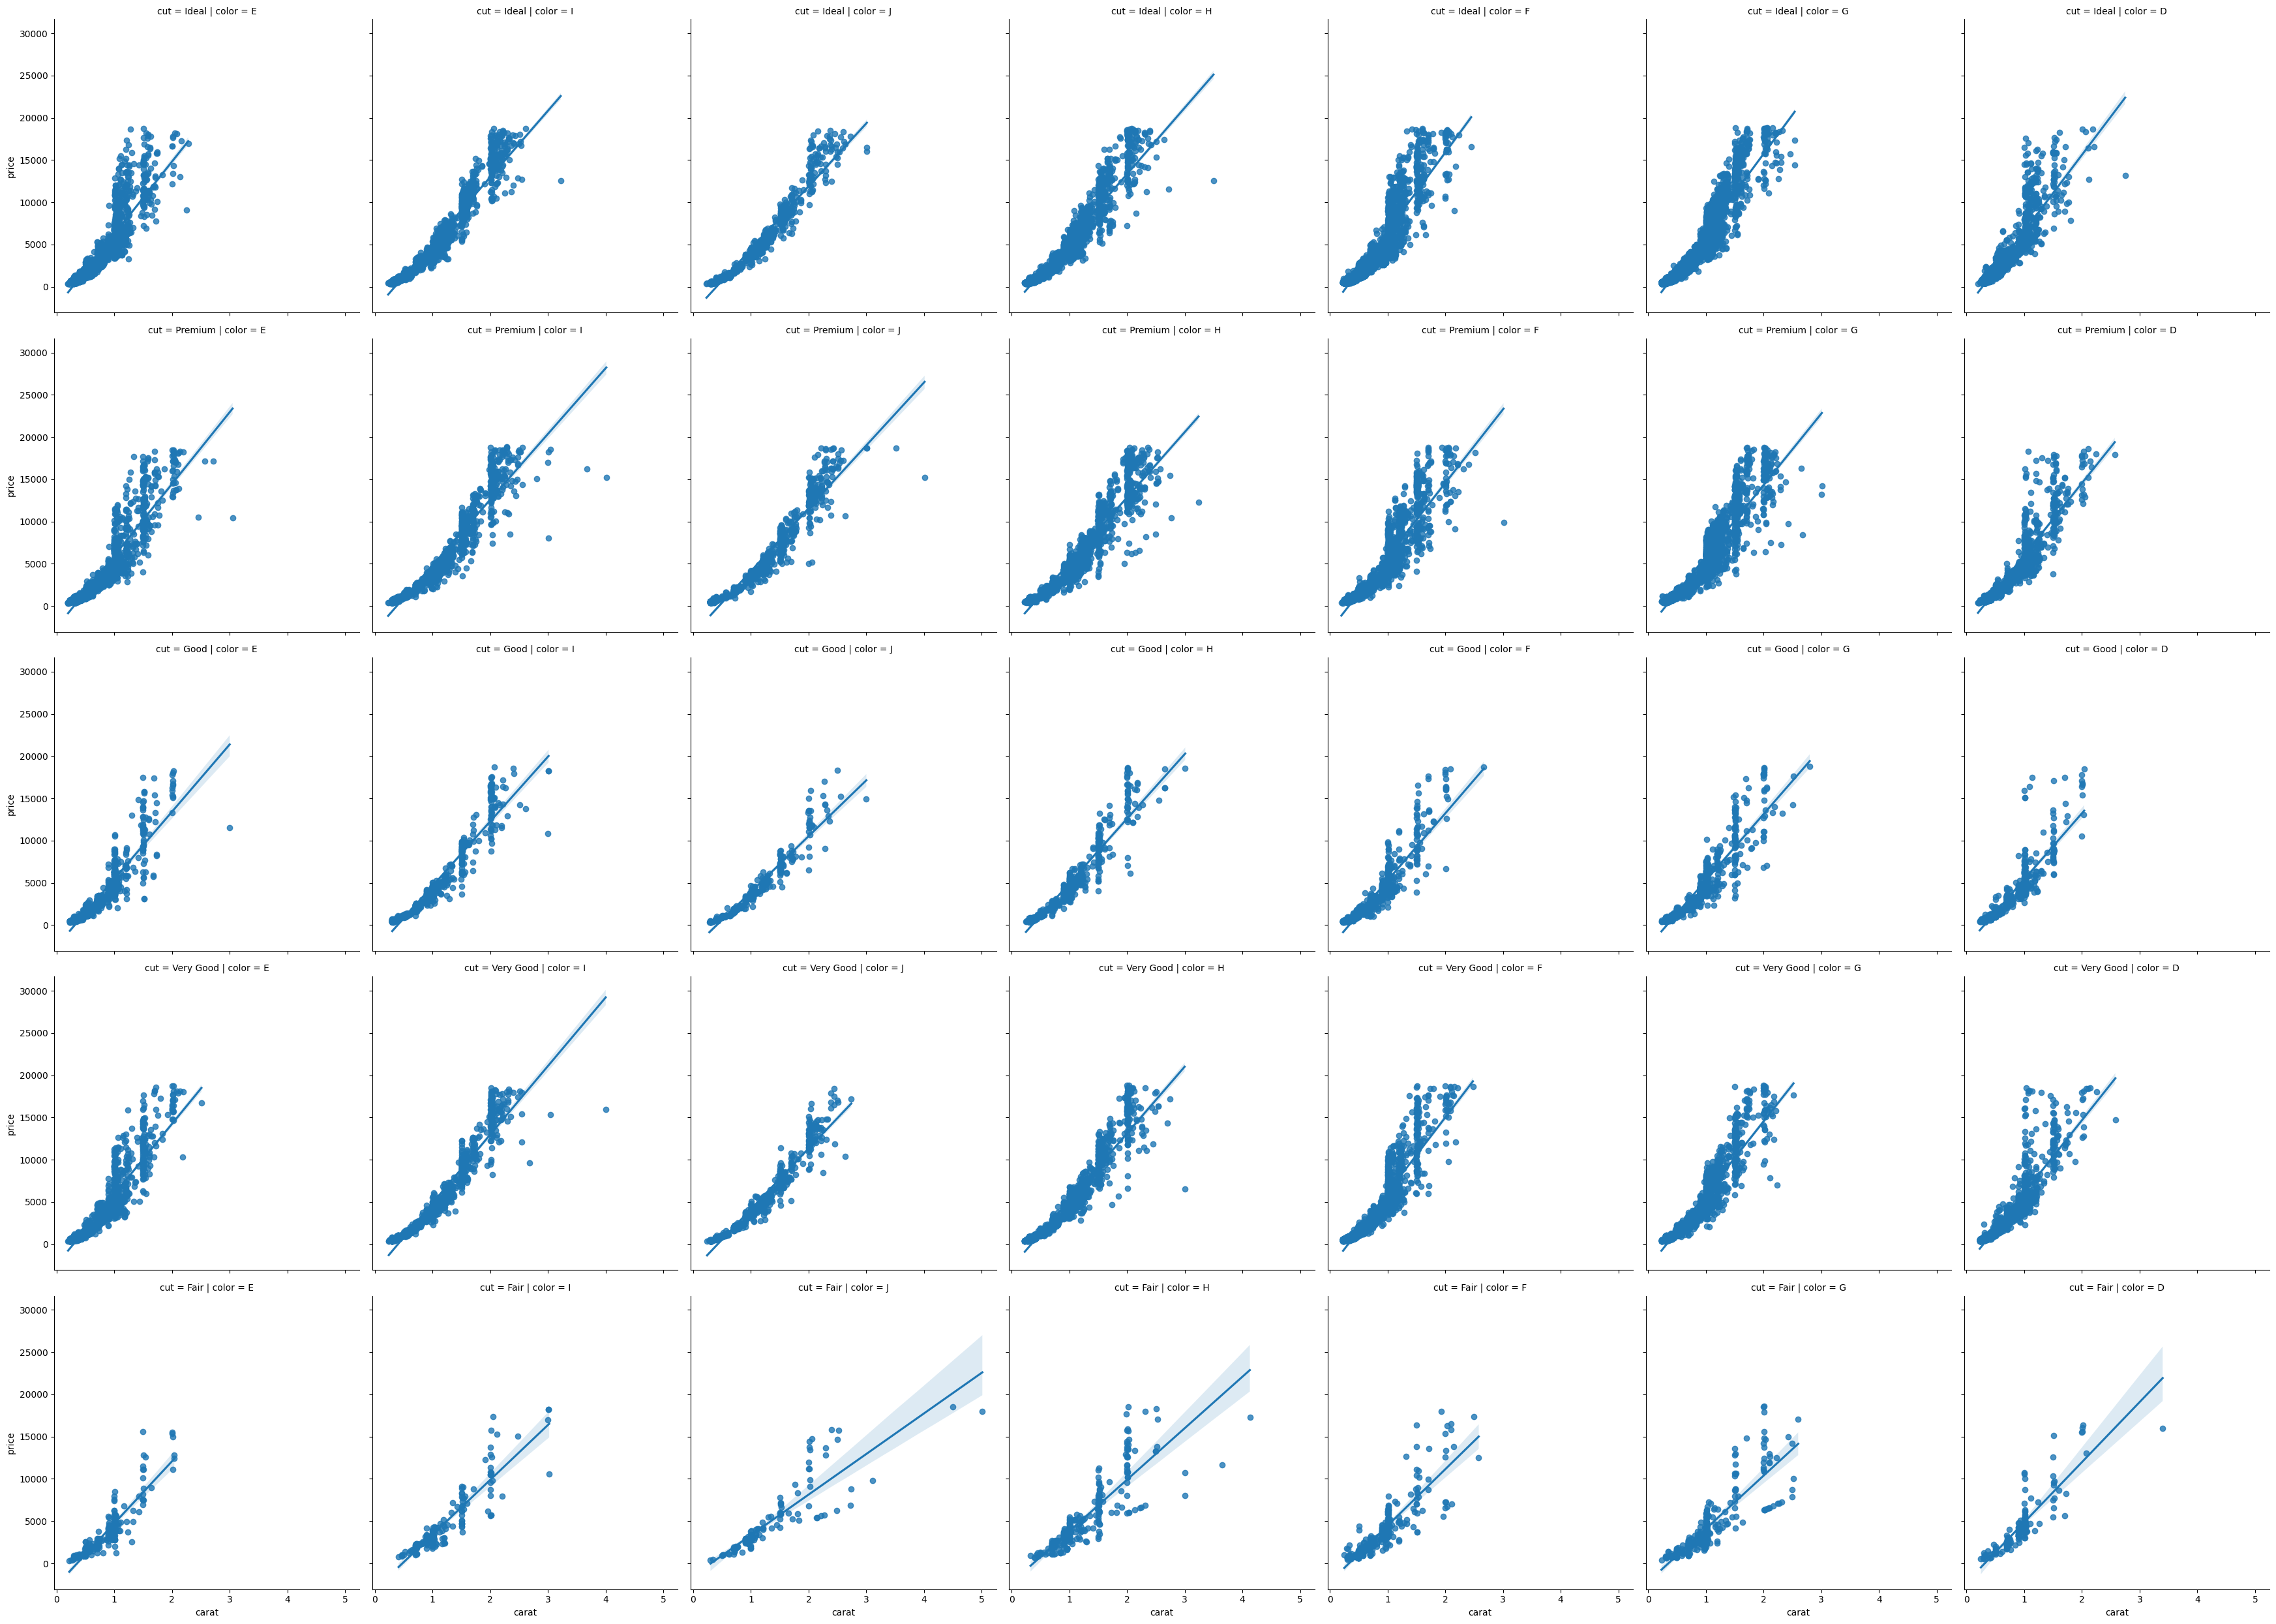

In [22]:
sns.lmplot(
    x='carat',
    y='price', 
    data=diamonds,
    row='cut',
    col='color'
    )

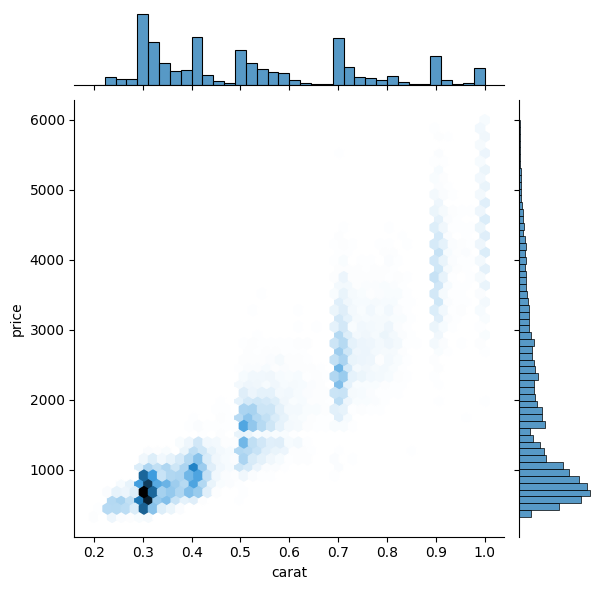

In [31]:
sns.jointplot(
    x='carat',
    y='price',
    data=diamonds.query('carat <= 1 and price < 6000'),
    kind='hex'
)

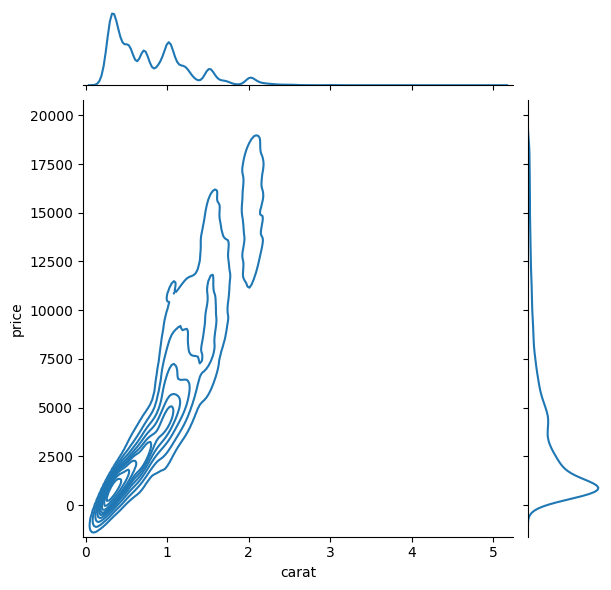

In [24]:
sns.jointplot(
    x='carat',
    y='price',
    kind='kde',
    data=diamonds
)

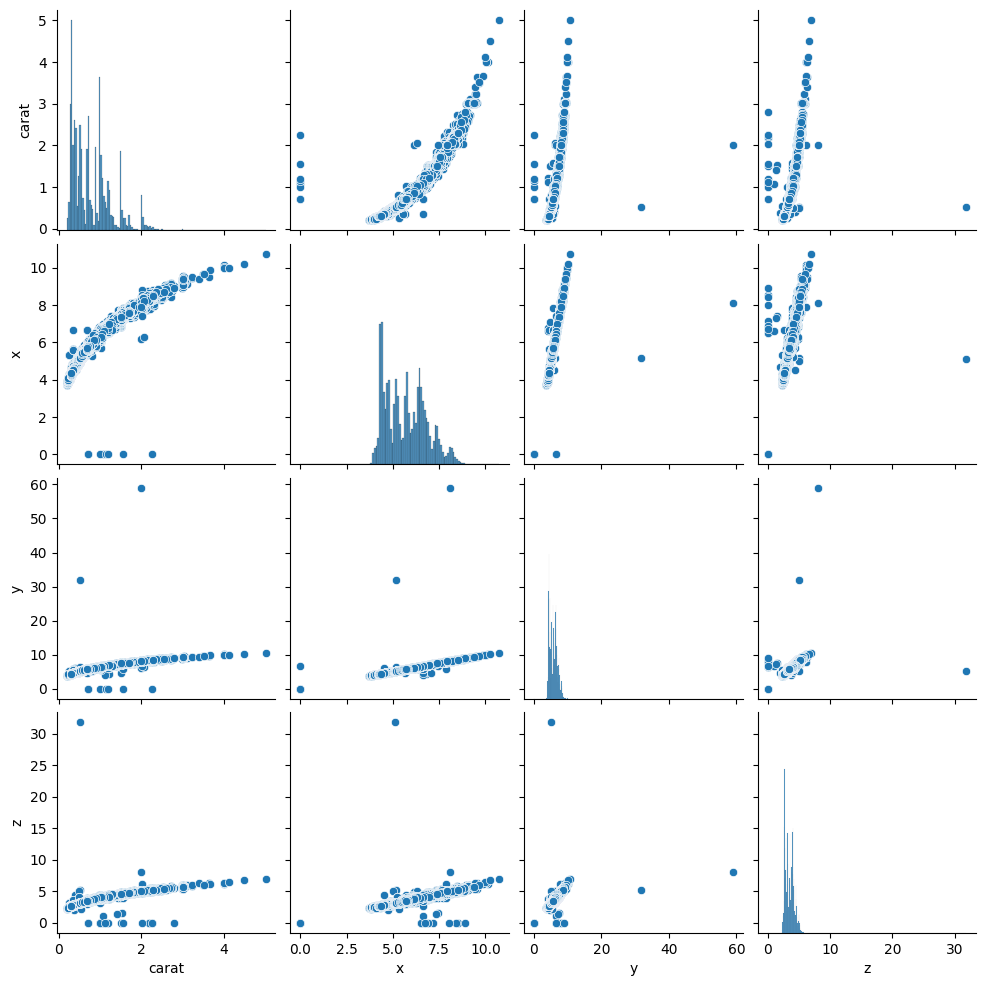

In [32]:
sns.pairplot(diamonds.loc[:,['carat','x','y','z']])

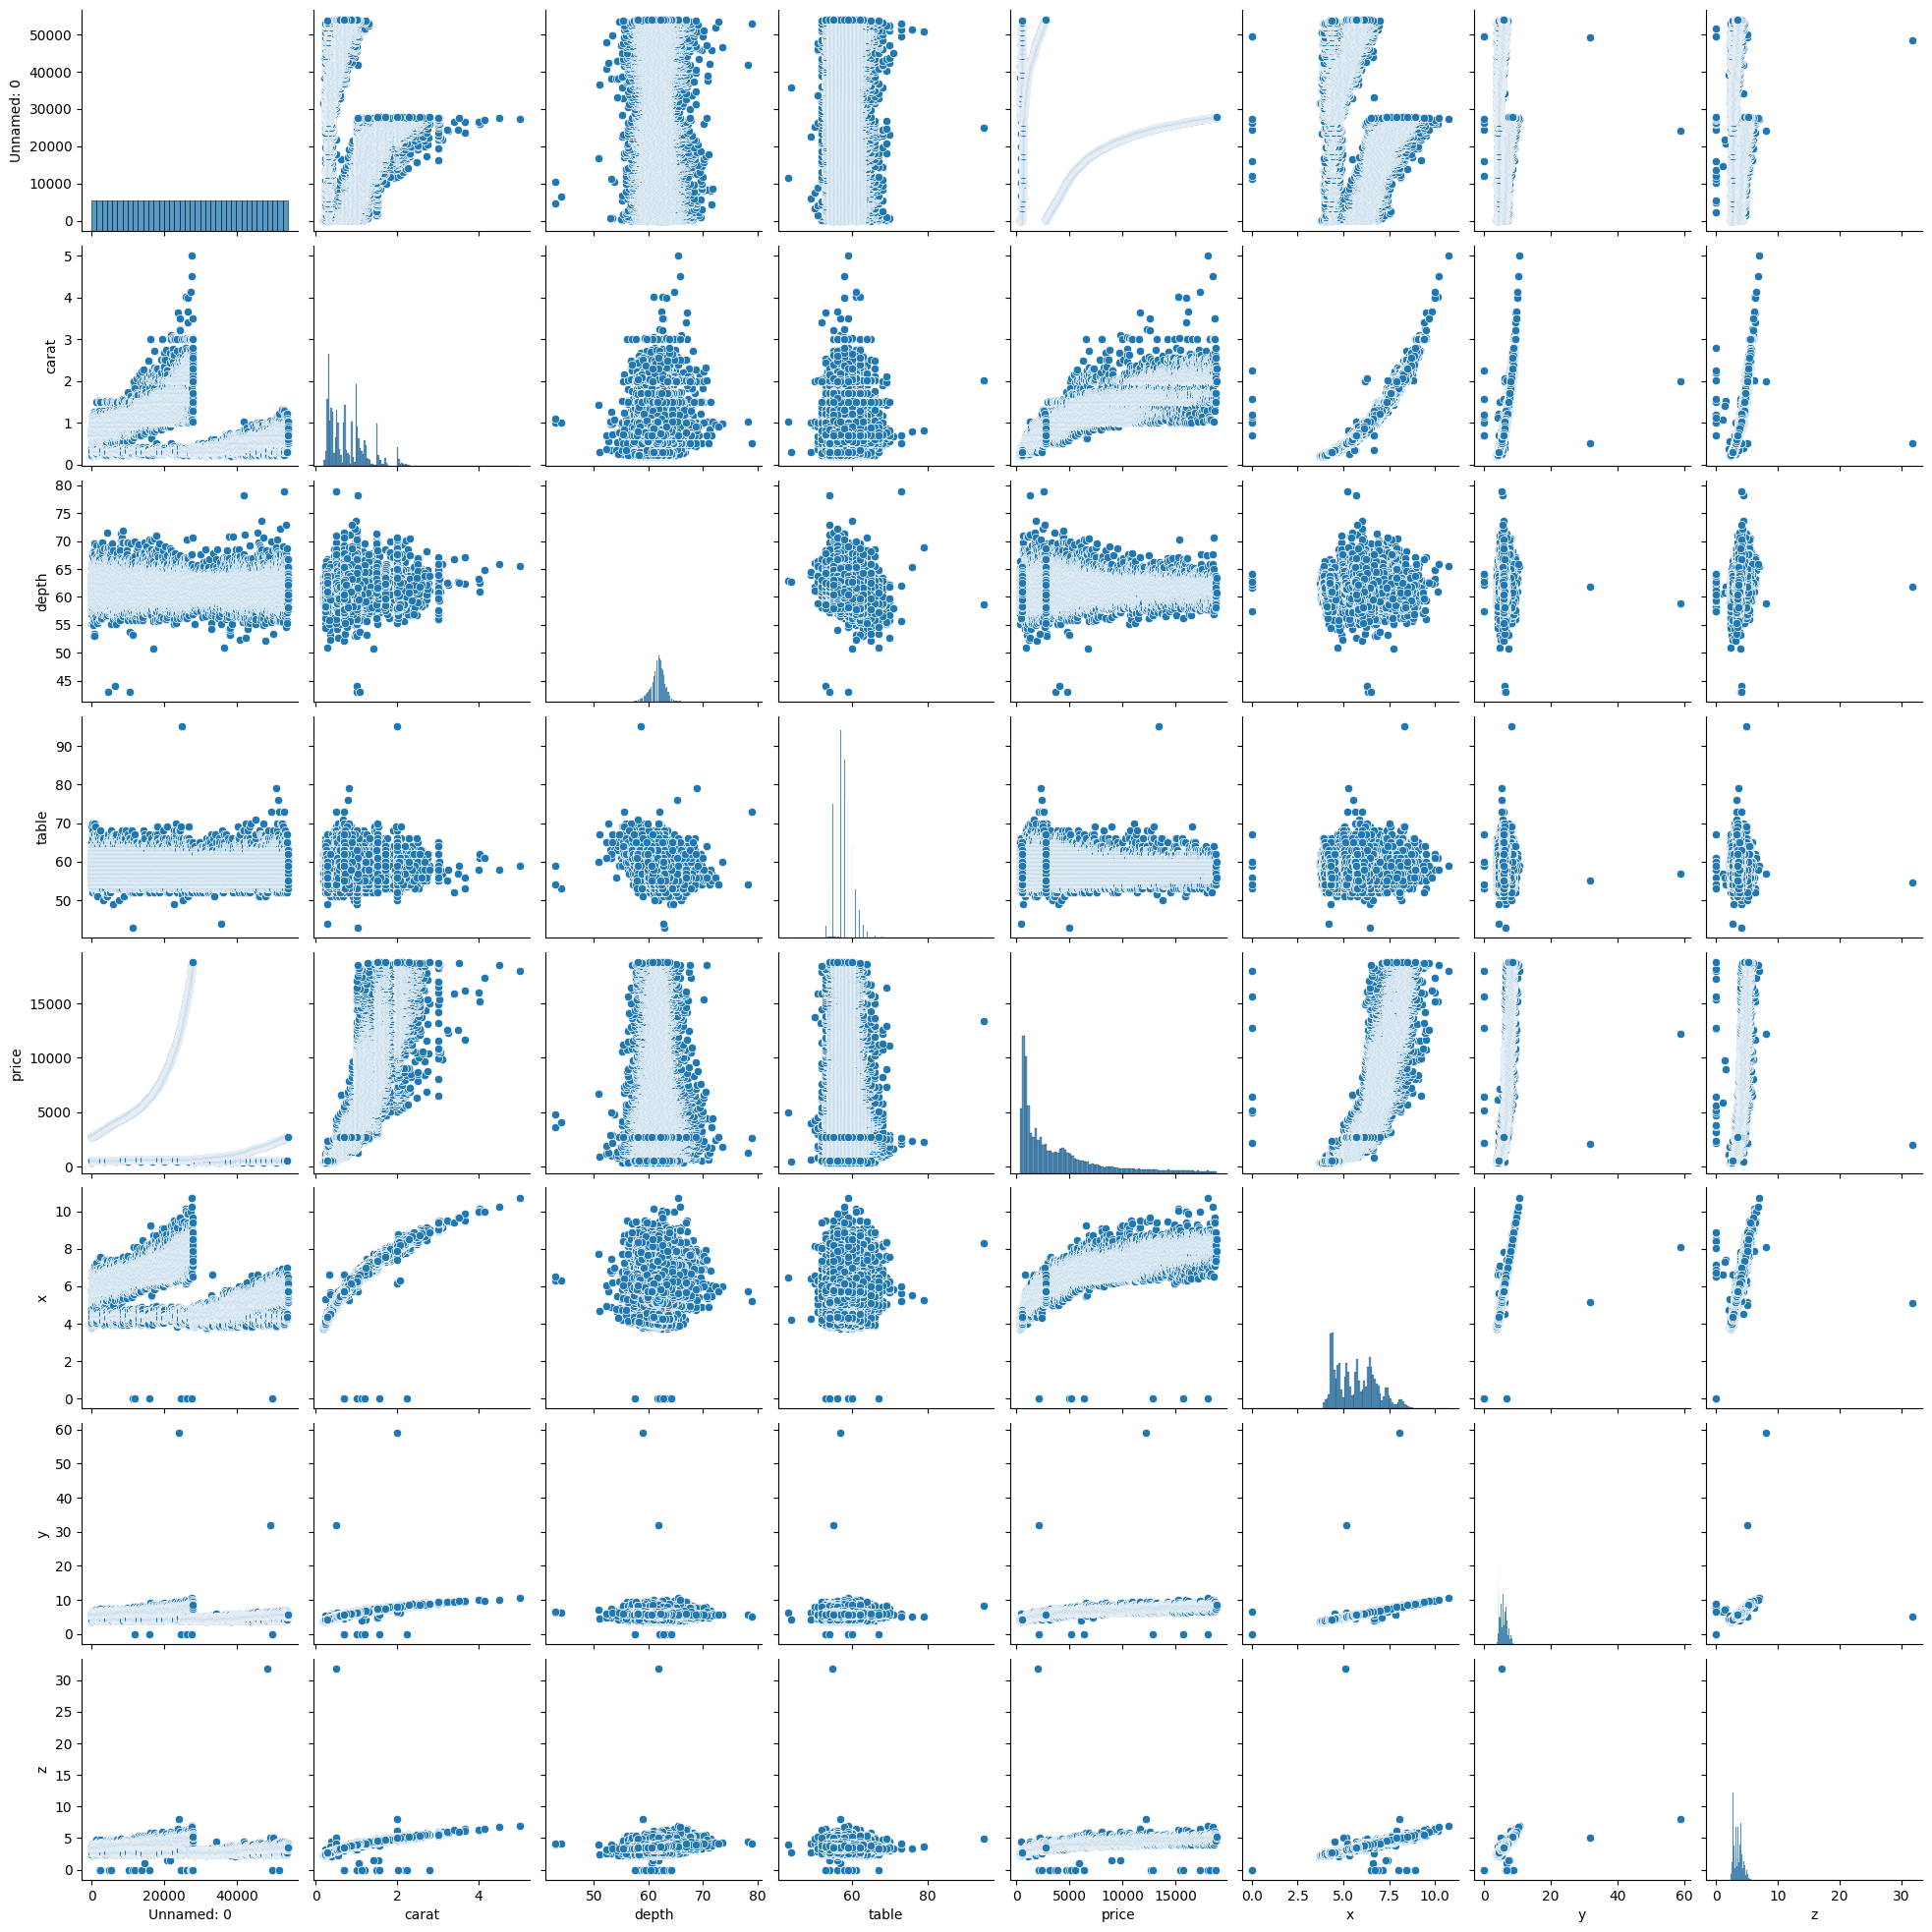

In [33]:
sns.pairplot(diamonds)

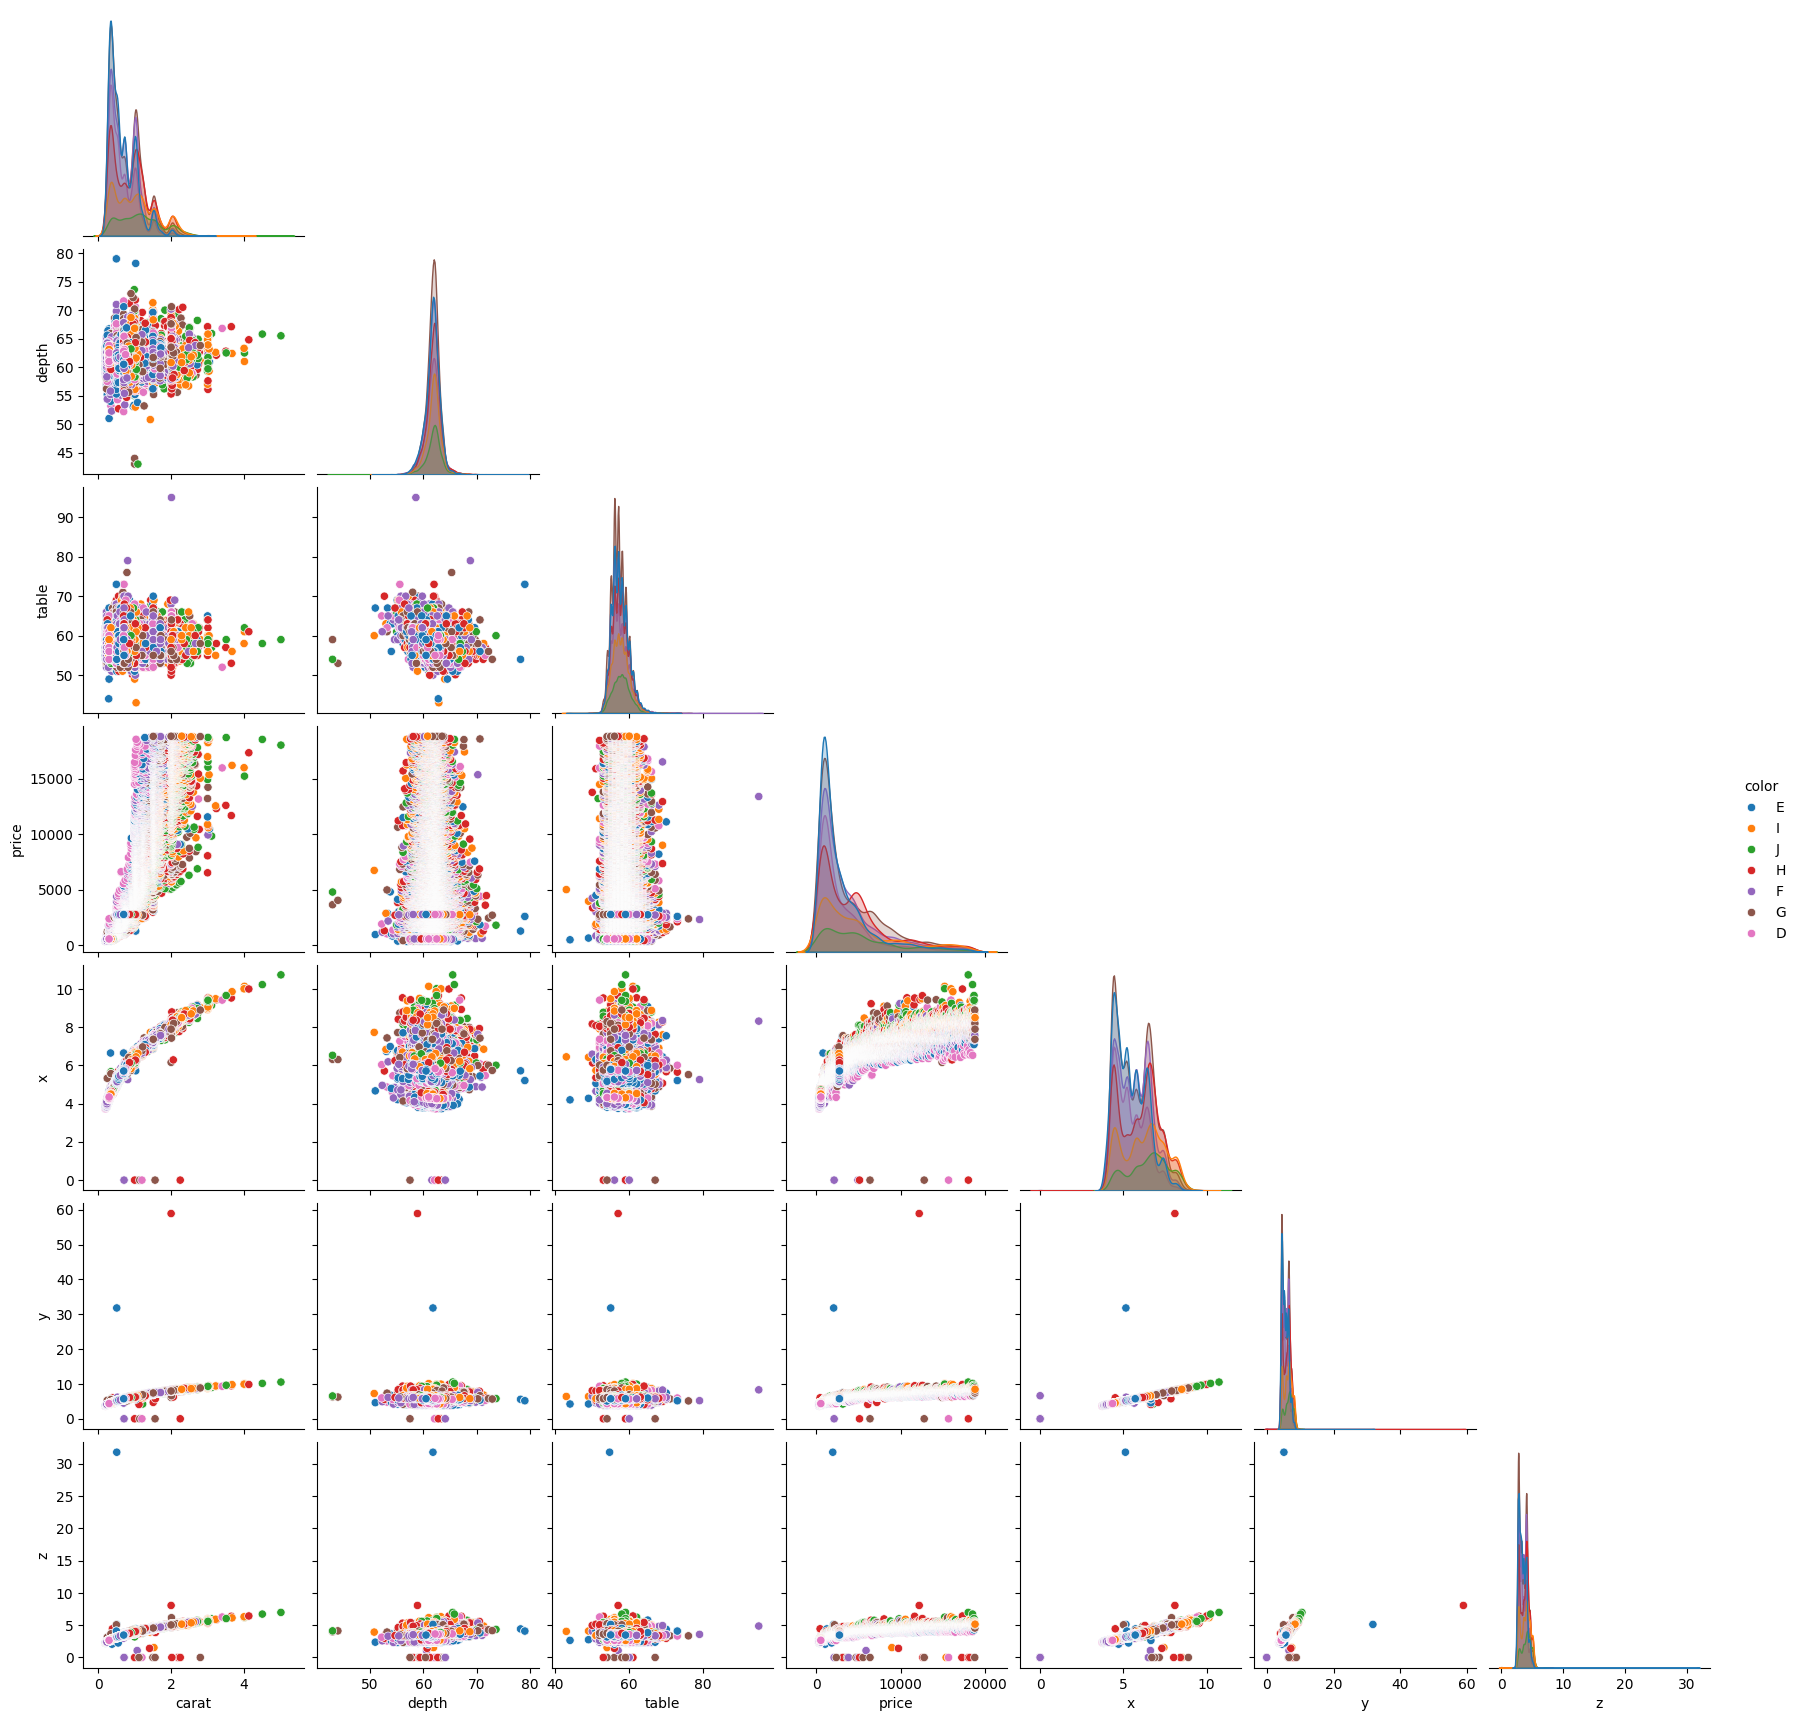

In [36]:
sns.pairplot(
    diamonds.iloc[:,1:],
    corner=True,
    hue='color',
    diag_kind='kde'
    )


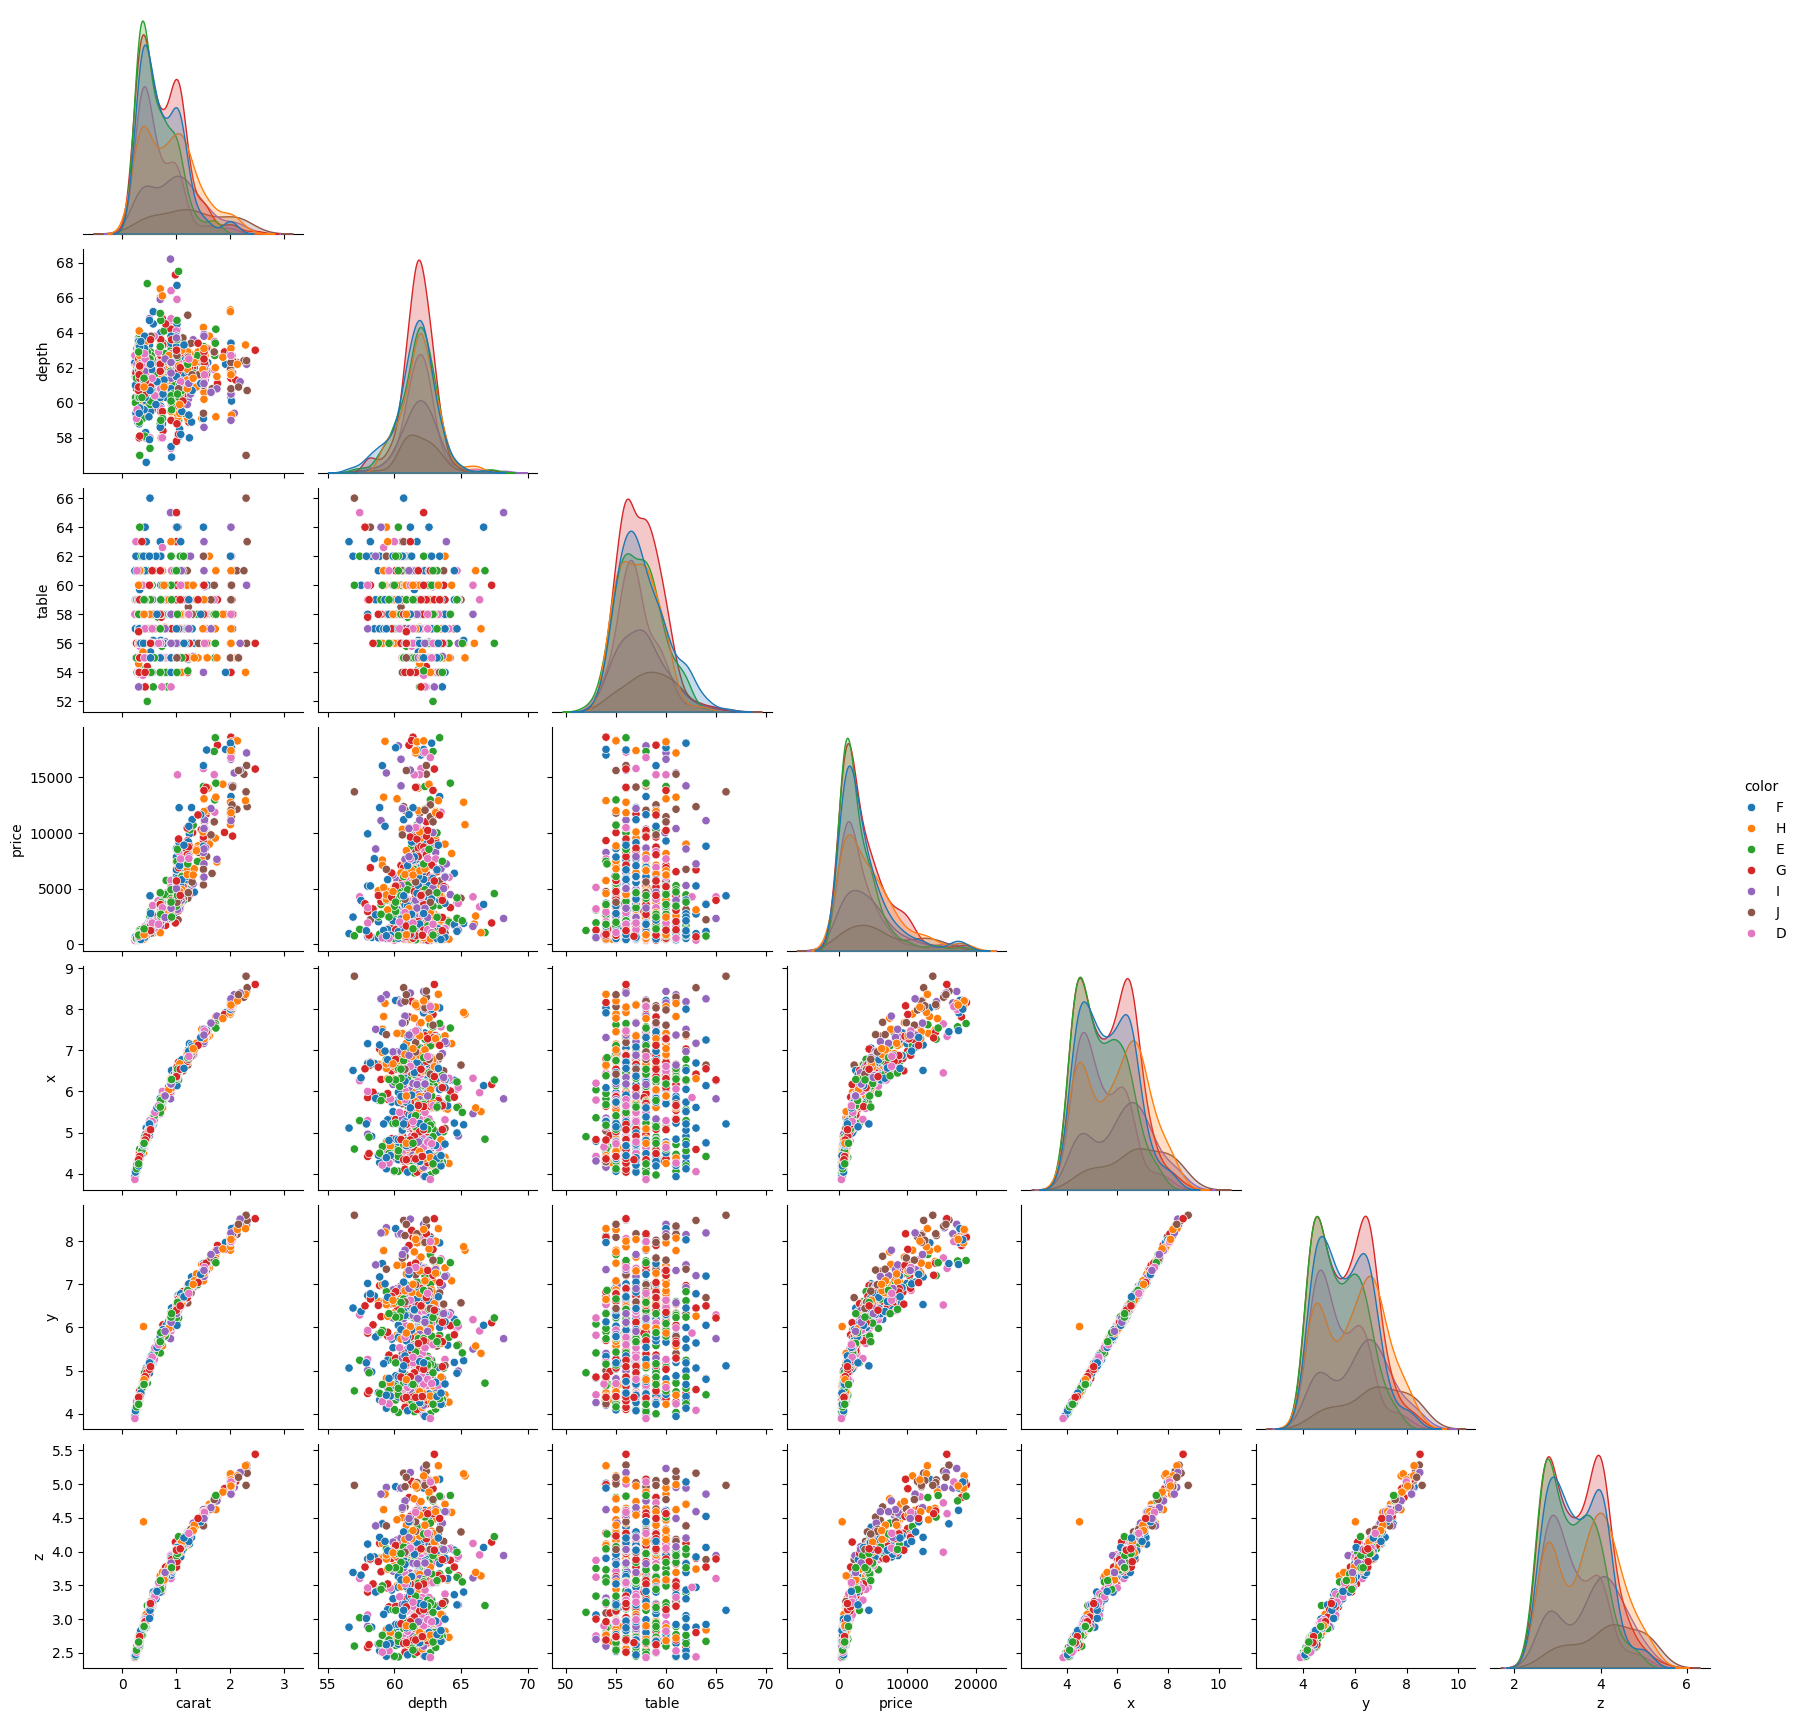

In [37]:
sns.pairplot(
    diamonds.iloc[:,1:].sample(1000),
    corner=True,
    hue='color',
    diag_kind='kde'
    )


In [38]:
diamonds_pivot = (
    diamonds.pivot_table(
        index="clarity",
        columns="color",
        values={"price":"mean"}
        )
).droplevel(0, axis=1)

diamonds_pivot.head()

color              D            E            F            G            H  \
clarity                                                                    
I1       3863.023810  3488.421569  3342.181818  3545.693333  4453.413580   
IF       8307.369863  3668.506329  2750.836364  2558.033774  2287.869565   
SI1      2976.146423  3161.670787  3713.776266  3774.787449  5032.414945   
SI2      3931.101460  4173.826036  4472.625233  5021.684109  6099.895074   
VS1      3030.158865  2856.294301  3796.717742  4131.362197  3780.688623   

color              I            J  
clarity                            
I1       4302.184783  5254.060000  
IF       1994.937063  3363.882353  
SI1      5355.019663  5186.048000  
SI2      7002.649123  6520.958246  
VS1      4633.183992  4884.461255

<Axes: xlabel='color', ylabel='clarity'>

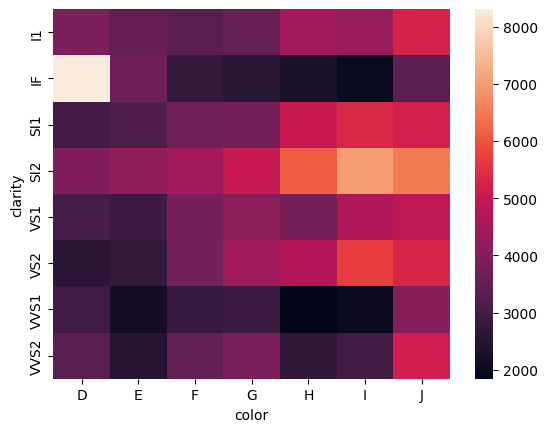

In [39]:
sns.heatmap(diamonds_pivot)

<Axes: xlabel='color', ylabel='clarity'>

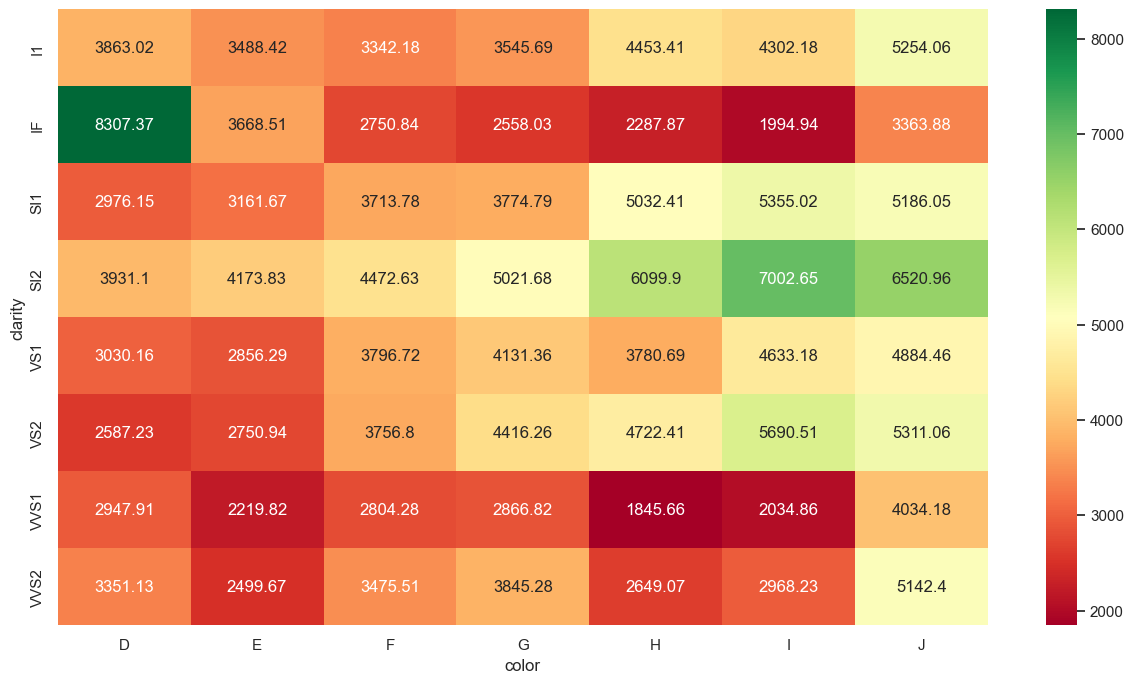

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(
    diamonds_pivot,
    annot=True,
    fmt='g',
    cmap='RdYlGn'
)

In [43]:
diamonds_pivot.corr()

color         D         E         F         G         H         I         J
color                                                                      
D      1.000000  0.512367 -0.463911 -0.546111 -0.334544 -0.441537 -0.562133
E      0.512367  1.000000  0.405193  0.277162  0.596832  0.475452  0.352153
F     -0.463911  0.405193  1.000000  0.974561  0.877970  0.938876  0.928143
G     -0.546111  0.277162  0.974561  1.000000  0.823159  0.910241  0.931565
H     -0.334544  0.596832  0.877970  0.823159  1.000000  0.974895  0.861069
I     -0.441537  0.475452  0.938876  0.910241  0.974895  1.000000  0.886332
J     -0.562133  0.352153  0.928143  0.931565  0.861069  0.886332  1.000000

<Axes: xlabel='color', ylabel='color'>

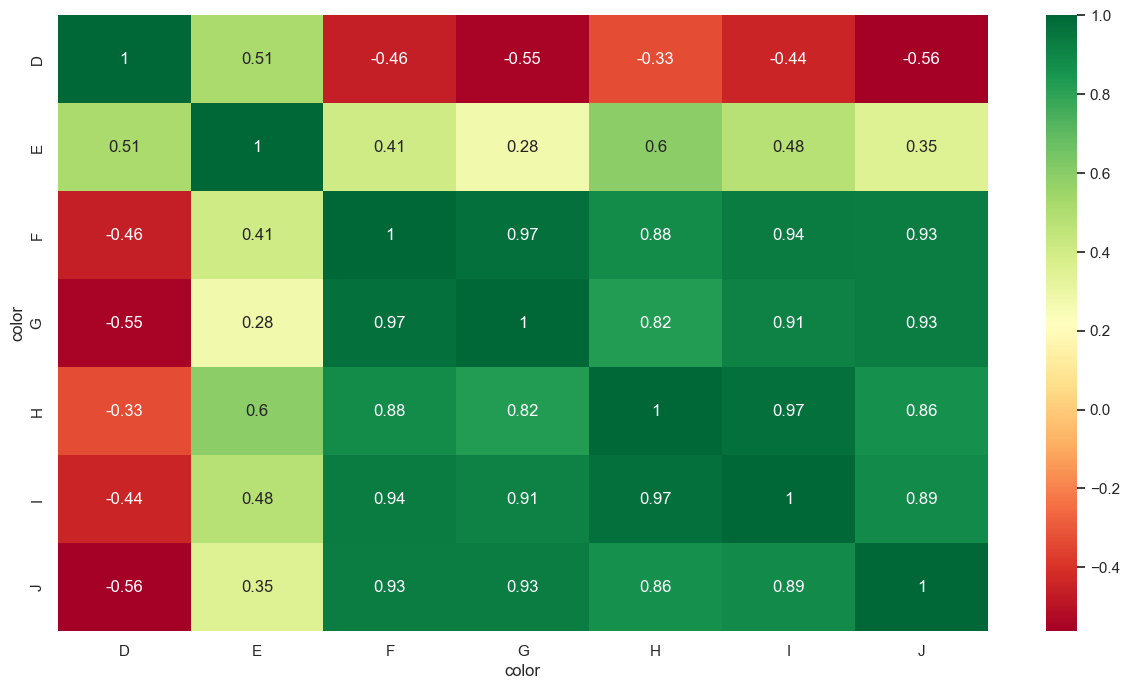

In [44]:
sns.heatmap(
    diamonds_pivot.corr(),
    annot=True,
    cmap='RdYlGn'
)

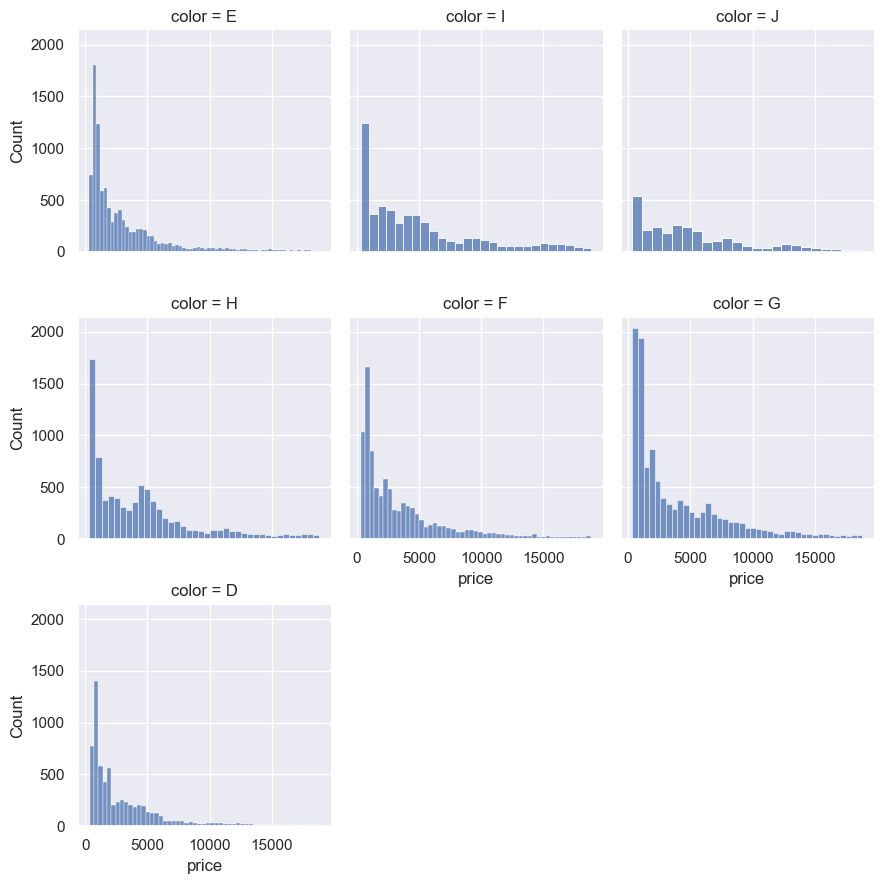

In [46]:
g = sns.FacetGrid(diamonds, col='color', col_wrap=3)
g.map_dataframe(sns.histplot, x='price')